## Poster Euclidian Metrics ##

In [2]:
#imports
import pandas as pd  # Data handling
import matplotlib.pyplot as plt # visualization
from scipy.integrate import odeint # numerical integration
import numpy as np
import seaborn as sns
from pyvbmc import VBMC # VMBC object
from pyvbmc import VariationalPosterior
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import scipy.integrate as integrate
from pyvbmc.parameter_transformer import ParameterTransformer


In [3]:
a_min = 0.0
a_max = 0.5
b_min = 1.0
b_max = 5.0
N = 10
Na = N
Nb = N

# reading in saved vps and their associated parameter values
param_values = np.loadtxt("param_values.csv")
vps = []
vbmcs = []
for i in range(len(param_values)):
    vps.append(VariationalPosterior.load("vp" + str(i) + ".pkl"))
    vbmcs.append(VariationalPosterior.load("vbmc" + str(i) + ".pkl"))

In [4]:
def euclidean_metric(vp,truth_array,D,LB,UB,PLB,PUB, n_samples = int(1e6),original = False):
    """
    Finds distance between truth and mean of samples from vp in unconstrained space
    """
    scaler = ParameterTransformer(D,LB,UB,PLB,PUB)
    scaled_truth = scaler.__call__(truth_array)
    Xs, _ = vp.sample(n_samples, orig_flag = False)
    mean = np.array([Xs[:,i].mean() for i in range(D)])
    if original:
        return np.linalg.norm(scaler.inverse(mean-scaled_truth))
    else:
        return np.linalg.norm(mean-scaled_truth)   

In [5]:
D = 2  # 2-D since there are 2 params we're estimating

LB = np.full((1, D), a_min)  # Lower bounds
LB[0][1] = b_min
UB = np.full((1, D), a_max)  # Upper bounds
UB[0][1] = b_max

PLB = np.copy(LB) + 0.05
PUB = np.copy(UB) - 0.05

#x0 = np.full((1, D), a_true+0.1) # starting point for inference   # 1.5 * np.ones((1, D))
#0[0][1] = b_true + 0.1

#print(LB,PLB,PUB,UB,'x0:',x0)

In [6]:
euclidean_grid = np.zeros((N,N))
#CI_grid = np.zeros((N,N))
count = 0
for i,a in enumerate(np.linspace(a_min,a_max,N)):     # a will be y axis in grid
    for j,b in enumerate(np.linspace(b_min,b_max,N)): # b will be x axis in grid
        euclidean_grid[i,j] = euclidean_metric(vps[count],np.atleast_2d(param_values[count]), D, LB, UB, PLB, PUB )
        print("vp" + str(count))
        count += 1

print(count)

vp0
vp1
vp2
vp3
vp4
vp5
vp6
vp7
vp8
vp9
vp10
vp11
vp12
vp13
vp14
vp15
vp16
vp17
vp18
vp19
vp20
vp21
vp22
vp23
vp24
vp25
vp26
vp27
vp28
vp29
vp30
vp31
vp32
vp33
vp34
vp35
vp36
vp37
vp38
vp39
vp40
vp41
vp42
vp43
vp44
vp45
vp46
vp47
vp48
vp49
vp50
vp51
vp52
vp53
vp54
vp55
vp56
vp57
vp58
vp59
vp60
vp61
vp62
vp63
vp64
vp65
vp66
vp67
vp68
vp69
vp70
vp71
vp72
vp73
vp74
vp75
vp76
vp77
vp78
vp79
vp80
vp81
vp82
vp83
vp84
vp85
vp86
vp87
vp88
vp89
vp90
vp91
vp92
vp93
vp94
vp95
vp96
vp97
vp98
vp99
100


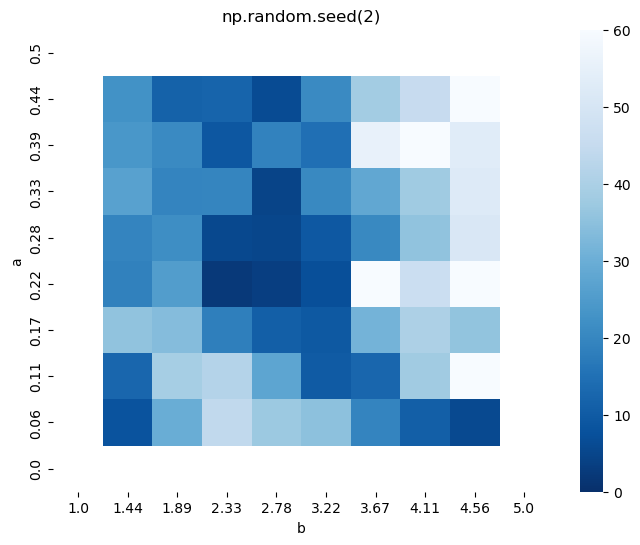

[[        inf         inf         inf         inf         inf         inf
          inf         inf         inf         inf]
 [        inf  7.97136487 29.55822294 43.91645124 37.08385094 35.00694739
  19.35025385 10.78968903  5.75381128         inf]
 [        inf 12.45094773 38.96632015 41.57615672 27.42819733  9.98302345
  12.63419886 37.97940774 65.24703531         inf]
 [        inf 35.59786156 33.85135233 18.22285881 10.78136774  9.54831786
  31.33702699 40.2273613  35.71030221         inf]
 [        inf 18.73089144 25.38561505  2.26701787  3.31549994  7.16084711
  61.43181164 46.5202987  83.11387359         inf]
 [        inf 19.38702785 21.79375845  5.48107602  5.00730162  9.18851419
  20.45935066 35.59441888 50.79027999         inf]
 [        inf 26.64349415 19.31830154 19.58796237  4.5196732  20.5561509
  28.17408352 37.74105922 52.16112446         inf]
 [        inf 23.71929193 20.76384927  9.08315551 18.9768676  14.5518434
  55.32435646 65.6135984  53.13784613         inf]
 [

In [10]:
colormap = sns.color_palette("Blues_r", as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(np.flip(euclidean_grid, axis = 0),cmap = colormap, vmin = 0, vmax = 60)
plt.title(r"np.random.seed(2)") #change to what seed you used
plt.xlabel("b")
plt.ylabel('a')
plt.xticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(b_min,b_max,N),2))
plt.yticks(ticks = np.arange(N)+0.5, labels = np.around(np.linspace(a_max,a_min,N),2))
plt.show()
print(euclidean_grid)